#### JupterLab Code
_If using Meluxina_  
`jupyter lab --no-browser --ip "*" --notebook-dir /project/home/p200469/BIO1018/BIO1018-Chromatin-Accessibility-ML  --port 8888`

Then look for token in setup text and use that as password when asked by VSCode or input the full URL with the token to avoid password authentication.

### Download Necessary Files
Dataset Link: https://www.encodeproject.org/reference-epigenomes/ENCSR247DVY/

In [48]:
cd /Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data

/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data


In [ ]:
# ATAC-Seq Bulk bed file
wget "https://www.encodeproject.org/files/ENCFF821OEF/@@download/ENCFF821OEF.bed.gz"

# Histone ChIP-seq - H3K27me3
wget "https://www.encodeproject.org/files/ENCFF904SHG/@@download/ENCFF904SHG.bigWig"

# Histone ChIP-seq - H3K4me1
wget "https://www.encodeproject.org/files/ENCFF372GMC/@@download/ENCFF372GMC.bigWig"

# Histone ChIP-seq - H3K27ac
wget "https://www.encodeproject.org/files/ENCFF051GGA/@@download/ENCFF051GGA.bigWig"

# Histone ChIP-seq - H3K4me3
wget "https://www.encodeproject.org/files/ENCFF163MXP/@@download/ENCFF163MXP.bigWig"

# Chromatin State
wget "https://www.encodeproject.org/files/ENCFF506GEX/@@download/ENCFF506GEX.bed.gz"

In [ ]:
#Unzip all gzipped ENCODE files.
gunzip *.gz

### Peak Density Visualization

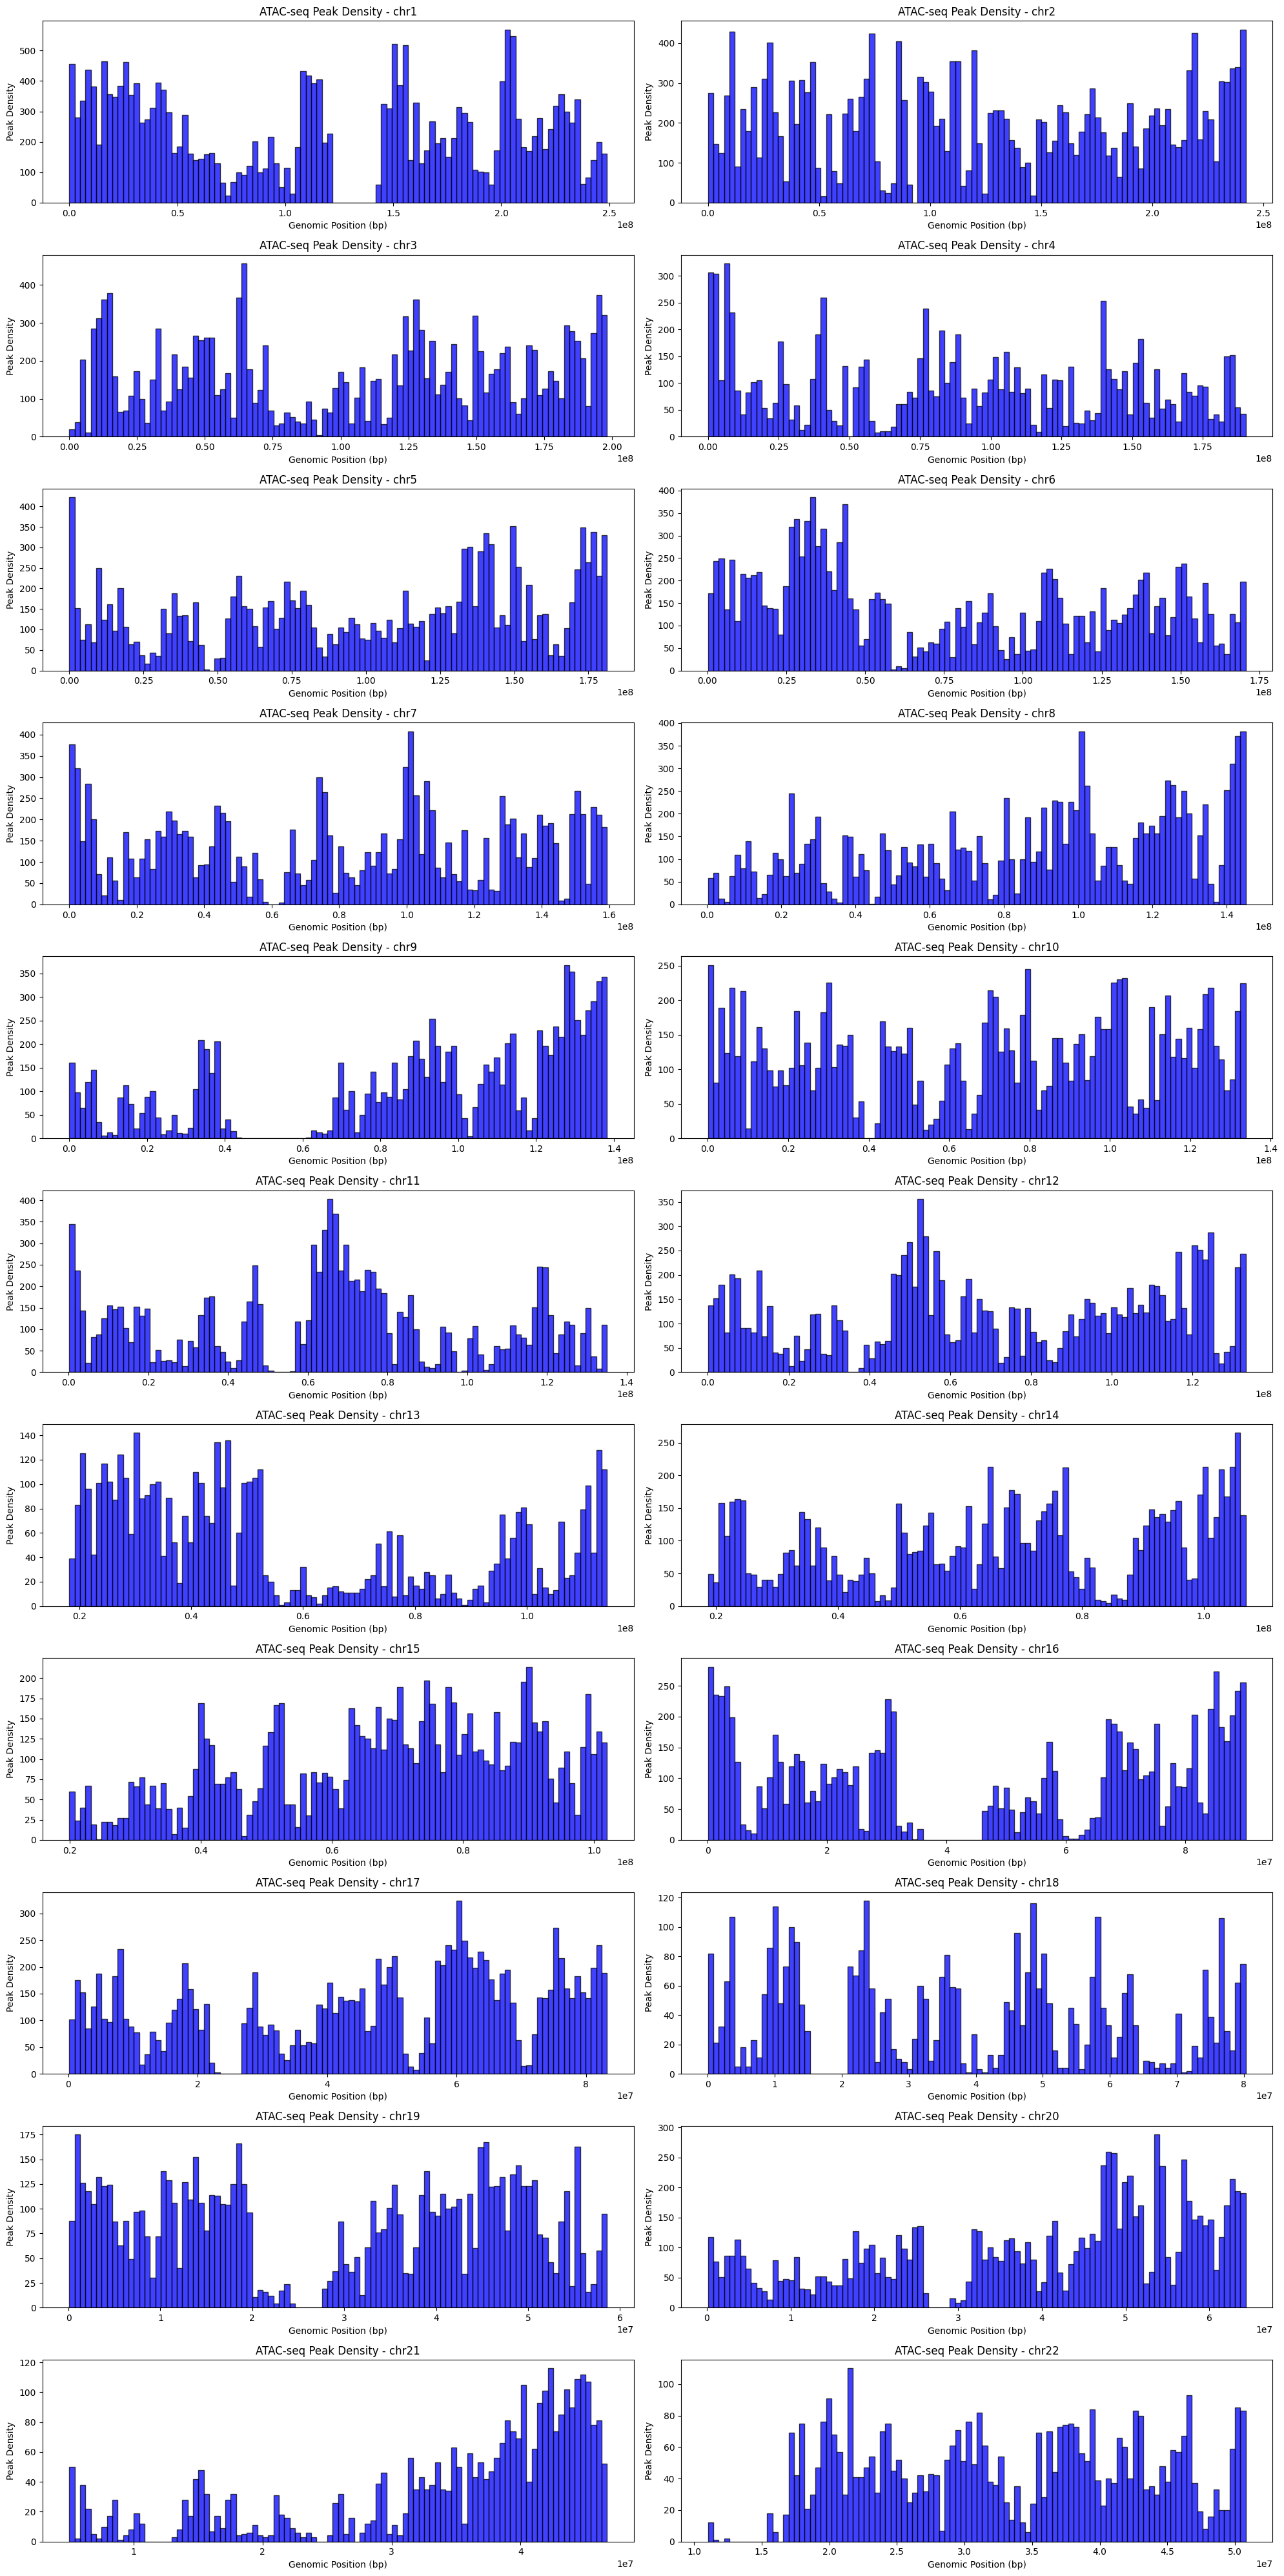

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the ATAC-seq BED file path (Re-upload if needed)
atac_seq_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/atac_bulk.bed"  # Update path if necessary

# Load ATAC-seq data with correct columns
column_names = ["chromosome", "start", "end", "name", "score", "strand", "signalValue", "pValue", "qValue", "peak"]

atac_peaks = pd.read_csv(atac_seq_file, sep="\t", names=column_names, usecols=[0, 1, 2, 3, 4, 6, 7, 8, 9])

# Ensure chromosome names are formatted correctly (e.g., 'chr1', 'chr2', ..., 'chr22')
valid_chromosomes = [f"chr{i}" for i in range(1, 23)]
atac_peaks = atac_peaks[atac_peaks["chromosome"].isin(valid_chromosomes)]

# Setup 2 columns and 11 rows for visualization
fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(20, 40))
axes = axes.flatten()  # Flatten axes for easier indexing

# Plot ATAC-seq peak density for each chromosome
for i, chrom in enumerate(valid_chromosomes):
    chrom_data = atac_peaks[atac_peaks["chromosome"] == chrom]

    if chrom_data.empty:
        continue  # Skip if no peaks found for this chromosome

    ax = axes[i]
    ax.hist(chrom_data["start"], bins=100, alpha=0.75, color='blue', edgecolor='black')
    ax.set_xlabel("Genomic Position (bp)")
    ax.set_ylabel("Peak Density")
    ax.set_title(f"ATAC-seq Peak Density - {chrom}")

plt.tight_layout()
plt.show()

### Understanding Histone Marks  
Each histone modification provides insight into chromatin state and gene regulation.  

### 🔵 H3K4me3 (Active Promoters)  
- Found at **transcription start sites (TSS)**.  
- Marks **actively transcribed or poised genes**.  
- Often co-localizes with **RNA polymerase II**.  

### 🟠 H3K4me1 (Enhancer Priming)  
- Marks **primed enhancers**, not necessarily active.  
- **With H3K27ac** → Active enhancer.  
- **Without H3K27ac** → Poised enhancer.  

### 🔴 H3K27me3 (Repressive Chromatin)  
- Found in **silenced genes** and **inactive enhancers**.  
- Marks **polycomb-repressed chromatin**.  
- Opposes **H3K27ac**, linked to **closed chromatin**.  

### 🟢 H3K27ac (Active Enhancer Marker)  
- Marks **active enhancers** and **promoters**.  
- Strongly correlates with **transcriptional activity**.  
- Used to identify **active regulatory regions**.  

### 🟣 H3K9me3 (Heterochromatin & Gene Silencing)  
- Marks **constitutive heterochromatin**, often found in **centromeres and telomeres**.  
- Associated with **long-term gene repression**.  
- Helps maintain **chromosomal stability** and **silencing of repetitive elements**.  

### 🟡 H3K36me3 (Transcriptional Elongation & Active Genes)  
- Found along the **gene bodies of actively transcribed genes**.  
- Associated with **RNA polymerase II elongation**.  
- Plays a role in **preventing cryptic transcription initiation**.  

### Summary Table  

| Histone Mark | Function | Associated Chromatin State |  
|-------------|----------|----------------------------|  
| **H3K27ac** | Active Enhancer | Open, Active Enhancers |  
| **H3K4me1** | Primed Enhancer | Open/Closed, Primed for Activation |  
| **H3K27me3** | Repressive Chromatin | Closed, Polycomb Repression |  
| **H3K4me3** | Active Promoters | Open, Actively Transcribed Genes |  
| **H3K9me3** | Heterochromatin & Gene Silencing | Closed, Constitutive Heterochromatin |  
| **H3K36me3** | Transcriptional Elongation | Open, Actively Transcribed Gene Bodies |  


> Install bigWigToBedGraph if necessary
1. Download the Precompiled macOS Binary  
`wget http://hgdownload.soe.ucsc.edu/admin/exe/macOSX.x86_64/bigWigToBedGraph`

2. Make the File Executable  
`chmod +x bigWigToBedGraph`

3. Move it to /usr/local/bin/ to Use it System-Wide  
`sudo mv bigWigToBedGraph /usr/local/bin/`

4. Verify Installation  
`which bigWigToBedGraph`

In [ ]:
# Convert H3K27ac bigWig to bedGraph
bigWigToBedGraph H3K27ac.bigWig H3K27ac.bedGraph

# Convert H3K4me1 bigWig to bedGraph
bigWigToBedGraph H3K4me1.bigWig H3K4me1.bedGraph

# Convert H3K27me3 bigWig to bedGraph
bigWigToBedGraph H3K27me3.bigWig H3K27me3.bedGraph

# Convert H3K4me3 bigWig to bedGraph
bigWigToBedGraph H3K4me3.bigWig H3K4me3.bedGraph

# Convert H3K9me3 bigWig to bedGraph
bigWigToBedGraph H3K9me3.bigWig H3K9me3.bedGraph

# Convert H3K36me3 bigWig to bedGraph
bigWigToBedGraph H3K36me3.bigWig H3K36me3.bedGraph

### Load ATAC-seq Peaks for Chromosome 1

In [1]:
import pandas as pd

atac_seq_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/atac_bulk_IDR.bed"  # Update path if necessary

# Load ATAC-seq data with correct columns
column_names = ["chromosome", "start", "end", "name", "score", "strand", "signalValue", "pValue", "qValue", "peak"]
atac_peaks = pd.read_csv(atac_seq_file, sep="\t", names=column_names, usecols=[0, 1, 2, 6])

# Filter for chromosome 1 only
atac_peaks = atac_peaks[atac_peaks["chromosome"] == "chr1"]

# Assign chromatin state (1 = Open)
atac_peaks["chromatin_state"] = 1  

# Calculate peak length
atac_peaks["peak_length"] = atac_peaks["end"] - atac_peaks["start"]

atac_peaks = atac_peaks[["chromosome", "start", "end", "peak_length", "chromatin_state"]]

# Compute and print the average peak length
average_peak_length = atac_peaks["peak_length"].mean()
print(f"Average ATAC-seq peak length (Chromosome 1): {average_peak_length:.2f} bp")

print(atac_peaks.head)

Average ATAC-seq peak length (Chromosome 1): 861.05 bp
<bound method NDFrame.head of        chromosome      start        end  peak_length  chromatin_state
16           chr1  114669579  114670864         1285                1
19           chr1  113904423  113905871         1448                1
26           chr1  113811517  113812742         1225                1
49           chr1  151281072  151282781         1709                1
87           chr1  114346089  114347072          983                1
...           ...        ...        ...          ...              ...
173544       chr1  151924704  151925512          808                1
173546       chr1  164558537  164559544         1007                1
173549       chr1   77218708   77219632          924                1
173568       chr1  154982862  154983659          797                1
173570       chr1   12143472   12144176          704                1

[16100 rows x 5 columns]>


In [2]:
summary_stats = atac_peaks["peak_length"].describe()
summary_stats

count    16100.000000
mean       861.047578
std        409.104933
min        150.000000
25%        548.000000
50%        808.000000
75%       1119.000000
max       2667.000000
Name: peak_length, dtype: float64

> I have chosen a bin size of 1000 bp to balance computational efficiency while minimizing excessive overlaps, ensuring it remains consistent with the median peak length of 808 bp from the dataset.

In [3]:
import numpy as np

# Chromosome 1 length (from human genome reference, ~248,956,422 bp)
chrom1_length = 248956422
bin_size = 1000

# Create genome bins
bin_starts = np.arange(0, chrom1_length, bin_size)
bin_ends = bin_starts + bin_size

# Create DataFrame
genome_bins = pd.DataFrame({
    "chromosome": "chr1",
    "start": bin_starts,
    "end": bin_ends,
    "chromatin_state": 0  # Assume closed
})

# Assign open regions from ATAC-seq peaks
for _, row in atac_peaks.iterrows():
    genome_bins.loc[
        (genome_bins["start"] >= row["start"]) & (genome_bins["end"] <= row["end"]),
        "chromatin_state"
    ] = 1

# Count the number of open (1) and closed (0) bins
chromatin_state_counts = genome_bins["chromatin_state"].value_counts()

# Print the counts
print(chromatin_state_counts)

# Show first few bins
print(genome_bins.head())

# Save the initial genome bins without histone marks
genome_bins.to_csv("genome_bins_chr1.csv", index=False)

print("Genome bins file created: genome_bins_chr1.csv")

chromatin_state
0    248548
1       409
Name: count, dtype: int64
  chromosome  start   end  chromatin_state
0       chr1      0  1000                0
1       chr1   1000  2000                0
2       chr1   2000  3000                0
3       chr1   3000  4000                0
4       chr1   4000  5000                0
Genome bins file created: genome_bins_chr1.csv


### Assign Open Peaks

In [1]:
import pandas as pd
import numpy as np

# Load ATAC-seq peak data
atac_seq_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/atac_bulk_IDR.bed"
column_names = ["chromosome", "start", "end", "name", "score", "strand", "signalValue", "pValue", "qValue", "peak"]
atac_peaks = pd.read_csv(atac_seq_file, sep="\t", names=column_names, usecols=[0, 1, 2, 6])

# Filter for chromosome 1
atac_peaks = atac_peaks[atac_peaks["chromosome"] == "chr1"]

# Chromosome 1 size (human reference)
chrom1_length = 248956422
bin_size = 1000  # 1kb bins

# Create genome bins
bin_starts = np.arange(0, chrom1_length, bin_size)
bin_ends = bin_starts + bin_size

genome_bins = pd.DataFrame({
    "chromosome": "chr1",
    "start": bin_starts,
    "end": bin_ends,
    "chromatin_state": 0  # Default: closed chromatin
})

# Assign open chromatin state (1) where ATAC-seq peaks overlap
for _, row in atac_peaks.iterrows():
    mask = (genome_bins["start"] >= row["start"]) & (genome_bins["end"] <= row["end"])
    genome_bins.loc[mask, "chromatin_state"] = 1

# Save genome bins without histone marks
genome_bins.to_csv("genome_bins_chr1.csv", index=False)
print("Genome bins file created: genome_bins_chr1.csv")

Genome bins file created: genome_bins_chr1.csv


## Assign Histone Mark Signals to each Bin

In [1]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/genome_bins_chr1.csv")

bed_df = df[["chromosome", "start", "end", "chromatin_state"]]

# Write out as a tab-delimited file without the header or index.
bed_df.to_csv("genome_bins_chr1.bed", sep="\t", header=False, index=False)

In [ ]:
### Run in command line

# Run bedtools map for each histone mark separately
bedtools map -a genome_bins_chr1.bed -b H3K4me1.bedGraph -c 4 -o mean > tmp_H3K4me1.bed
bedtools map -a genome_bins_chr1.bed -b H3K4me3.bedGraph -c 4 -o mean > tmp_H3K4me3.bed
bedtools map -a genome_bins_chr1.bed -b H3K27ac.bedGraph -c 4 -o mean > tmp_H3K27ac.bed
bedtools map -a genome_bins_chr1.bed -b H3K27me3.bedGraph -c 4 -o mean > tmp_H3K27me3.bed
bedtools map -a genome_bins_chr1.bed -b H3K9me3.bedGraph -c 4 -o mean > tmp_H3K9me3.bed
bedtools map -a genome_bins_chr1.bed -b H3K36me3.bedGraph -c 4 -o mean > tmp_H3K36me3.bed

############
# Extract the mapped value column from each intermediate file
cut -f5 tmp_H3K4me1.bed > H3K4me1_col.txt
cut -f5 tmp_H3K4me3.bed > H3K4me3_col.txt
cut -f5 tmp_H3K27ac.bed > H3K27ac_col.txt
cut -f5 tmp_H3K27me3.bed > H3K27me3_col.txt
cut -f5 tmp_H3K9me3.bed > H3K9me3_col.txt
cut -f5 tmp_H3K36me3.bed > H3K36me3_col.txt

# Merge the columns into a final CSV file
paste -d, <(sed 's/\t/,/g' genome_bins_chr1.bed) H3K4me1_col.txt H3K4me3_col.txt H3K27ac_col.txt H3K27me3_col.txt H3K9me3_col.txt H3K36me3_col.txt  > genome_bins_histones_chr1.csv

# Replace missing values with 0
awk -F',' 'BEGIN {OFS=","} {if ($5==".") $5="0"; print}' genome_bins_histones_chr1.csv > tmp && mv tmp genome_bins_histones_chr1.csv
awk -F',' 'BEGIN {OFS=","} {if ($6==".") $6="0"; print}' genome_bins_histones_chr1.csv > tmp && mv tmp genome_bins_histones_chr1.csv
awk -F',' 'BEGIN {OFS=","} {if ($7==".") $7="0"; print}' genome_bins_histones_chr1.csv > tmp && mv tmp genome_bins_histones_chr1.csv
awk -F',' 'BEGIN {OFS=","} {if ($8==".") $8="0"; print}' genome_bins_histones_chr1.csv > tmp && mv tmp genome_bins_histones_chr1.csv
awk -F',' 'BEGIN {OFS=","} {if ($9==".") $9="0"; print}' genome_bins_histones_chr1.csv > tmp && mv tmp genome_bins_histones_chr1.csv
awk -F',' 'BEGIN {OFS=","} {if ($10==".") $10="0"; print}' genome_bins_histones_chr1.csv > tmp && mv tmp genome_bins_histones_chr1.csv

# Remove temp files
rm tmp_H3K4me1.bed tmp_H3K4me3.bed tmp_H3K27ac.bed tmp_H3K27me3.bed tmp_H3K9me3.bed tmp_H3K36me3.bed
rm H3K4me1_col.txt H3K4me3_col.txt H3K27ac_col.txt H3K27me3_col.txt H3K9me3_col.txt H3K36me3_col.txt

### (Optional) Use Python to overlap Histone Marks

In [ ]:
import pandas as pd
import numpy as np

# Define bin size (in bp)
bin_size = 1000

# Load genome bins and ensure column names match expectations.
genome_bins = pd.read_csv("genome_bins_chr1.csv")
genome_bins = genome_bins.rename(columns={"chromosome": "Chromosome", "start": "Start", "end": "End"})
n_bins = len(genome_bins)  # number of bins

# Dictionary with histone mark names and corresponding bedGraph files.
histone_files = {
    "H3K4me1": "H3K4me1.bedGraph",
    "H3K4me3": "H3K4me3.bedGraph",
    "H3K27ac": "H3K27ac.bedGraph",
    "H3K27me3": "H3K27me3.bedGraph",
}

# Initialize new columns in genome_bins for each histone mark.
for mark in histone_files.keys():
    genome_bins[mark] = 0.0

# Process each histone mark file in chunks.
for mark, filename in histone_files.items():
    print(f"Processing {mark} from {filename}...")
    # Array to accumulate weighted signal sum per bin.
    signal_sum = np.zeros(n_bins, dtype=np.float64)
    
    chunksize = 100000  # adjust as needed
    for chunk in pd.read_csv(filename, sep='\t', header=None,
                             names=['chrom', 'start', 'end', 'score'],
                             chunksize=chunksize):
        # Keep only rows for chromosome 1.
        chunk = chunk[chunk['chrom'] == "chr1"]
        # Process each interval using itertuples for speed.
        for row in chunk.itertuples(index=False):
            s = row.start
            e = row.end
            score = row.score
            
            # Compute first and last bin indices for the interval.
            first_bin = int(s // bin_size)
            last_bin = int((e - 1) // bin_size)
            
            # Clip indices to valid range.
            if first_bin < 0:
                first_bin = 0
            if last_bin >= n_bins:
                last_bin = n_bins - 1
                
            # Loop over affected bins.
            for bin_index in range(first_bin, last_bin + 1):
                bin_start = bin_index * bin_size
                bin_end = bin_start + bin_size
                # Calculate overlap between the bin and the interval.
                overlap = min(bin_end, e) - max(bin_start, s)
                if overlap > 0:
                    signal_sum[bin_index] += overlap * score
                    
    # Divide the accumulated signal by the bin size to get the average per bp.
    avg_signal = signal_sum / bin_size
    genome_bins[mark] = avg_signal

# Save the final genome bins with histone marks.
genome_bins.to_csv("genome_bins_histones_chr1.csv", index=False)
print("Genome bins file with histone marks created: genome_bins_histones_chr1.csv")

Processing H3K4me1 from H3K4me1.bedGraph...
Processing H3K4me3 from H3K4me3.bedGraph...
Processing H3K27ac from H3K27ac.bedGraph...
Processing H3K27me3 from H3K27me3.bedGraph...
Genome bins file with histone marks created: genome_bins_histones_chr1.csv


### Remove Duplicate Values

In [34]:
import pandas as pd

histone_signals_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/genome_bins_histones_chr1.csv"

# Load histone signal data (Fix the incorrect names format and missing header)
histone_columns = ["chromosome", "start", "end", "chromatin_state", "H3K4me1", "H3K4me3", "H3K27ac", "H3K27me3", "H3K9me3", "H3K36me3"]
df = pd.read_csv(histone_signals_file, sep=",", header=None, names=histone_columns)

# Drop duplicates based on columns 5-10 (H3K4me1 to H3K36me3)
df_cleaned = df.drop_duplicates(subset=histone_columns[4:])

# Save the cleaned data (optional)
df_cleaned.to_csv("genome_bins_histones_chr1_dedup.csv", index=False)

### Distribution Plots for Peak Lengths & Histone Marks

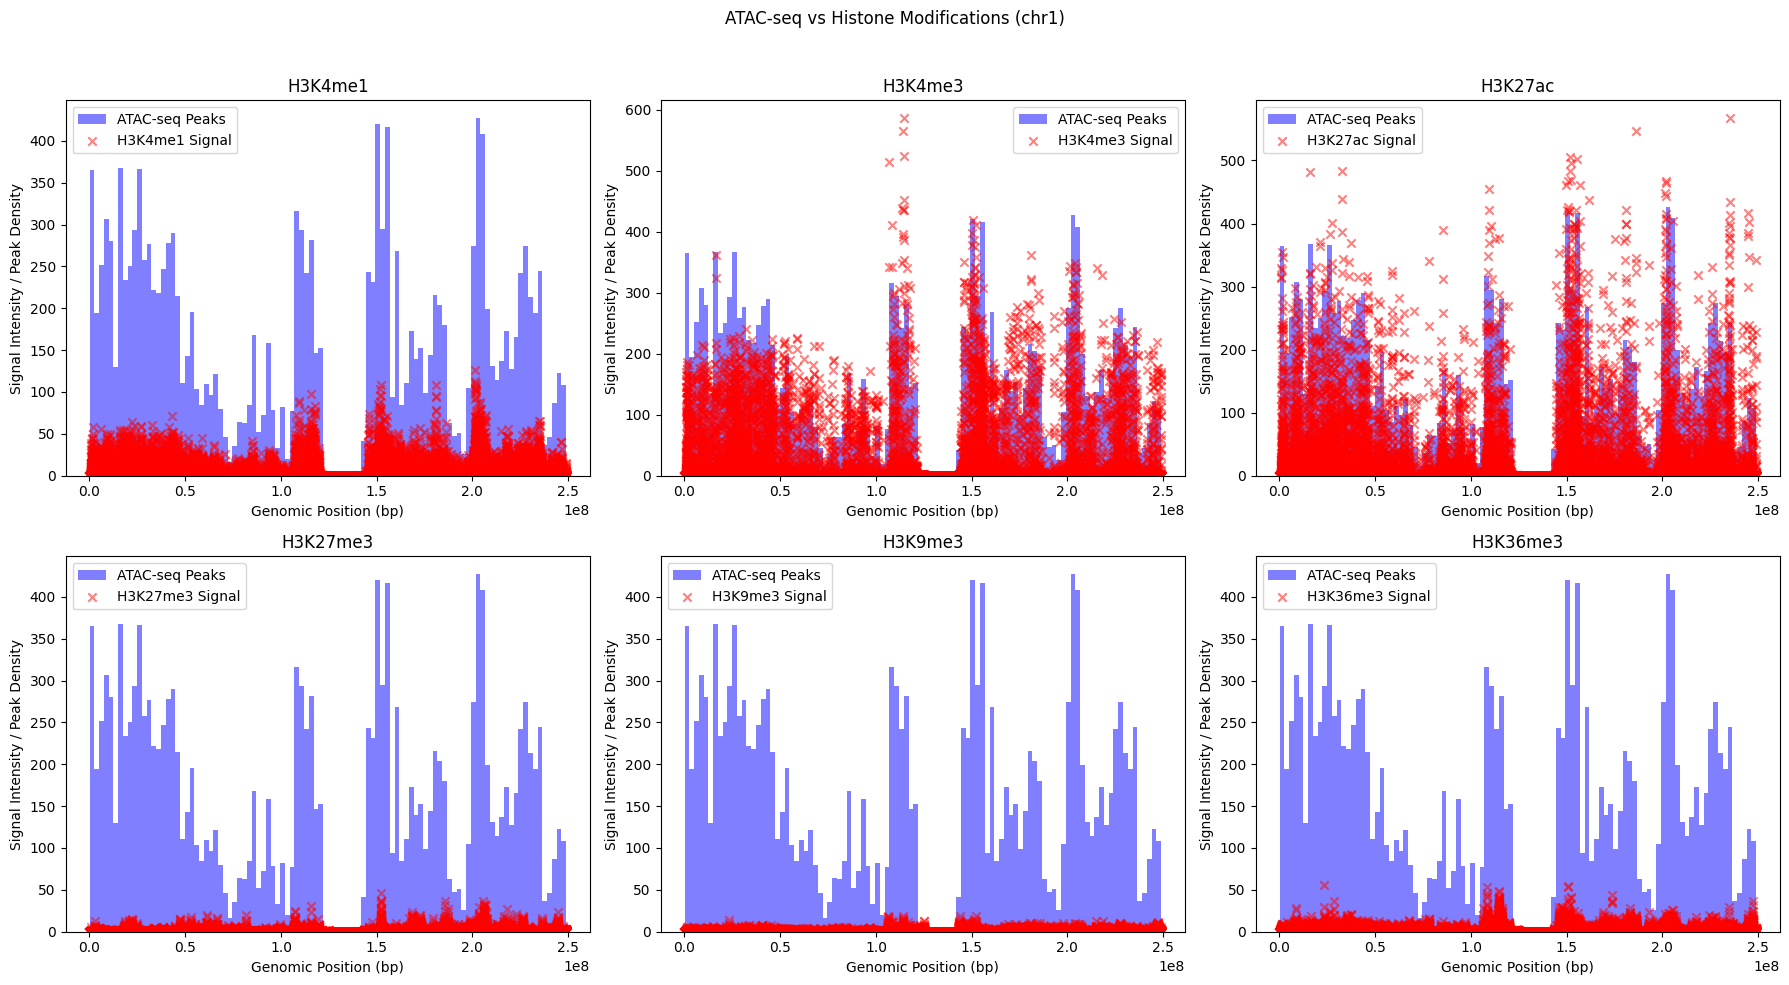

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data files
atac_seq_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/atac_bulk_IDR.bed"
histone_signals_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/genome_bins_histones_chr1.csv"

# Load ATAC-seq data
column_names = ["chromosome", "start", "end", "signalValue"]
atac_peaks = pd.read_csv(atac_seq_file, sep="\t", names=column_names, header=0, usecols=[0, 1, 2, 6])

# Load histone signal data (Fix the incorrect names format and missing header)
histone_columns = ["chromosome", "start", "end", "chromatin_state", "H3K4me1", "H3K4me3", "H3K27ac", "H3K27me3", "H3K9me3", "H3K36me3"]
histone_signals = pd.read_csv(histone_signals_file, sep=",", header=None, names=histone_columns)

# Filter ATAC-seq data for chromosome 1
atac_peaks = atac_peaks[atac_peaks["chromosome"] == "chr1"]

# Compute ATAC-seq peak midpoints
atac_peaks["midpoint"] = (atac_peaks["start"] + atac_peaks["end"]) / 2

# Histone marks to plot
histone_marks = ["H3K4me1", "H3K4me3", "H3K27ac", "H3K27me3", "H3K9me3", "H3K36me3"]

# Create 2x3 subplots to fit all histone marks
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("ATAC-seq vs Histone Modifications (chr1)")

# Flatten the axes array to make iteration easier
axes = axes.flatten()

# Loop through histone marks and plot them
for i, histone in enumerate(histone_marks):
    ax = axes[i]

    # Plot histogram of ATAC-seq peaks
    ax.hist(atac_peaks["midpoint"], bins=100, alpha=0.5, color="blue", label="ATAC-seq Peaks")

    # Scatter plot for histone modification signals
    ax.scatter(histone_signals["start"], histone_signals[histone], color="red", alpha=0.5, marker="x", label=f"{histone} Signal")

    # Labels and legend
    ax.set_xlabel("Genomic Position (bp)")
    ax.set_ylabel("Signal Intensity / Peak Density")
    ax.set_title(f"{histone}")
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for the title
plt.show()

### **Histone Modifications and Chromatin Accessibility Analysis**  

The plots illustrate the relationship between chromatin accessibility (ATAC-seq peaks) and histone modifications (H3K4me1, H3K4me3, H3K27ac, H3K27me3, H3K9me3, and H3K36me3) across chromosome 1. ATAC-seq identifies regions of open chromatin, while histone modifications define chromatin states and regulatory activity.  

Each plot overlays ATAC-seq peak density (blue histogram) with histone modification signals (red markers), highlighting their expected associations:  

- **H3K4me1** marks active enhancers, with signals broadly distributed across open chromatin.  
- **H3K4me3** is associated with active promoters, peaking near strong ATAC-seq signals.  
- **H3K27ac** is found at active enhancers and promoters, aligning with ATAC-seq peaks.  
- **H3K27me3** is a repressive mark, largely absent from accessible chromatin, indicating gene silencing.  
- **H3K9me3** is linked to heterochromatin and transcriptional repression, with signals enriched in closed chromatin regions.  
- **H3K36me3** is associated with transcription elongation, showing widespread distribution across gene bodies.  

These results reinforce known chromatin dynamics: active histone marks co-occur with open chromatin, while repressive marks remain in inaccessible regions. Such insights provide a foundation for predictive modeling of regulatory elements and chromatin states.

### Boxplot for Each Histone Mark

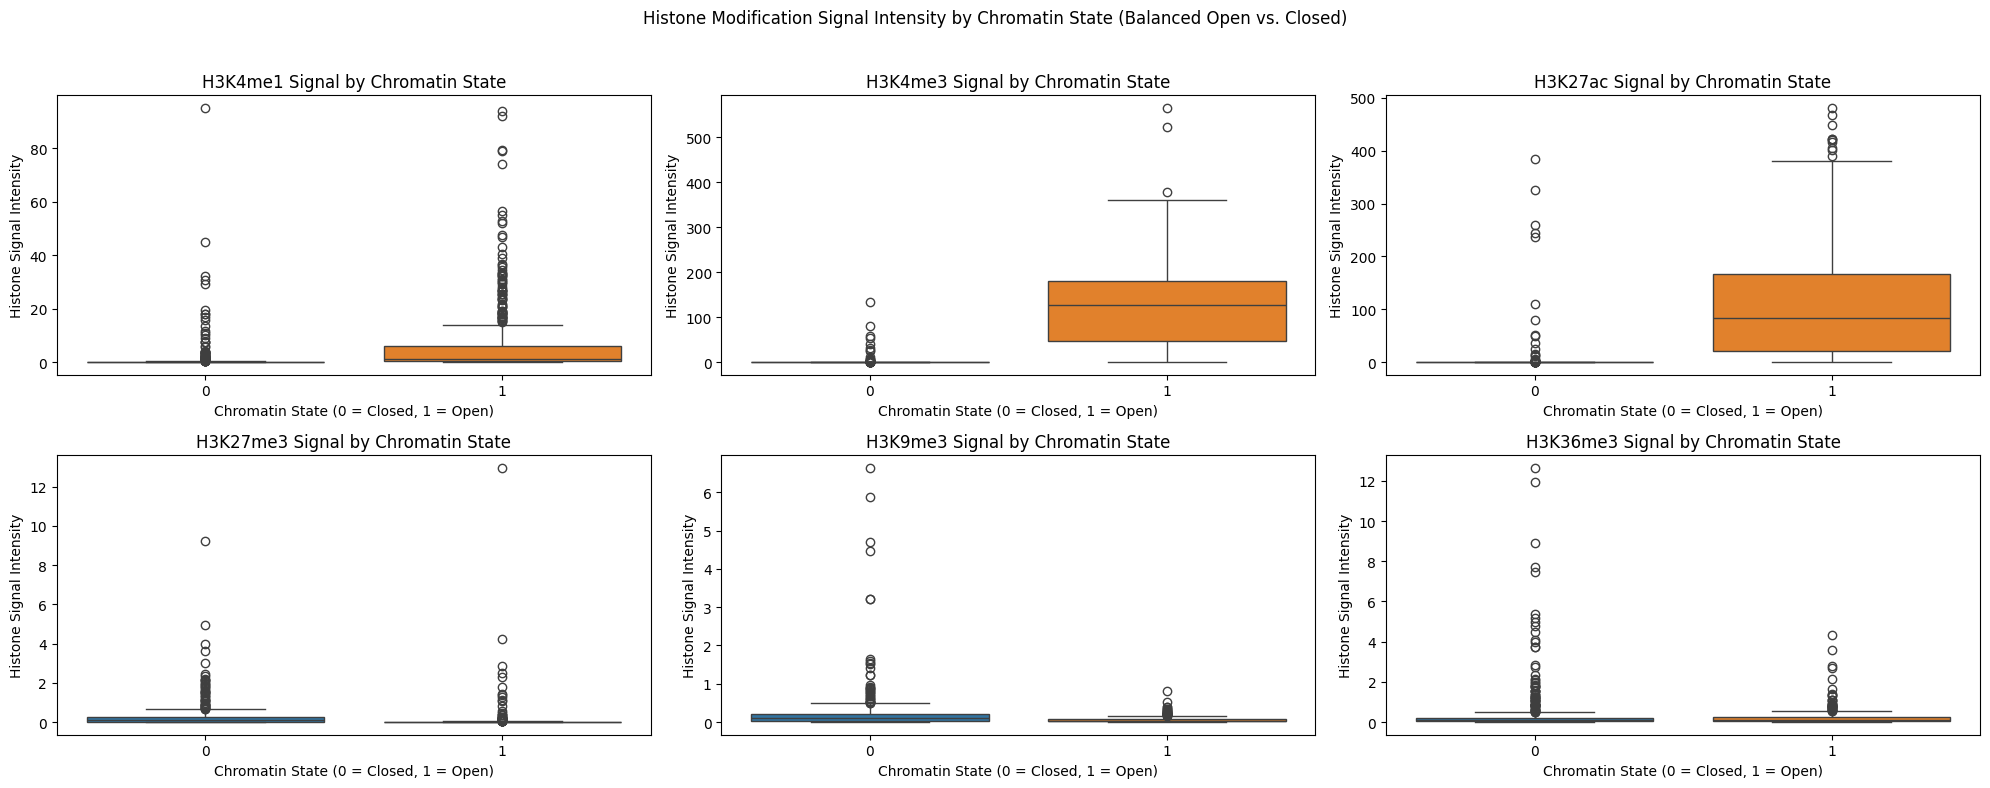

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load histone signal data
histone_signals_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/genome_bins_histones_chr1.csv"

# Load histone signal data (Fix the incorrect names format and missing header)
histone_columns = ["chromosome", "start", "end", "chromatin_state", "H3K4me1", "H3K4me3", "H3K27ac", "H3K27me3", "H3K9me3", "H3K36me3"]
histone_signals = pd.read_csv(histone_signals_file, sep=",", header=None, names=histone_columns)

# Histone marks
histone_marks = ["H3K4me1", "H3K4me3", "H3K27ac", "H3K27me3", "H3K9me3", "H3K36me3"]

# Ensure equal sample sizes by downsampling closed chromatin (0)
open_chromatin = histone_signals[histone_signals["chromatin_state"] == 1]
closed_chromatin = histone_signals[histone_signals["chromatin_state"] == 0].sample(n=len(open_chromatin), random_state=42)

# Combine balanced dataset
balanced_df = pd.concat([open_chromatin, closed_chromatin])

# Create subplots for histone mark distributions by chromatin state
fig, axes = plt.subplots(2, 3, figsize=(20, 8))
fig.suptitle("Histone Modification Signal Intensity by Chromatin State (Balanced Open vs. Closed)")

for i, histone in enumerate(histone_marks):
    ax = axes[i // 3, i % 3]
    sns.boxplot(data=balanced_df, x="chromatin_state", y=histone, ax=ax, hue="chromatin_state", legend=False)
    ax.set_title(f"{histone} Signal by Chromatin State")
    ax.set_xlabel("Chromatin State (0 = Closed, 1 = Open)")
    ax.set_ylabel("Histone Signal Intensity")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Mann-Whitney U Test (Statistical Significance)
To test if histone signal values differ significantly between open (1) and closed (0) chromatin, we can use the Mann-Whitney U test.

In [42]:
from scipy.stats import mannwhitneyu

# Load histone signal data
histone_signals_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/genome_bins_histones_chr1.csv"

# Load histone signal data (Fix the incorrect names format and missing header)
histone_columns = ["chromosome", "start", "end", "chromatin_state", "H3K4me1", "H3K4me3", "H3K27ac", "H3K27me3", "H3K9me3", "H3K36me3"]
histone_signals = pd.read_csv(histone_signals_file, sep=",", header=None, names=histone_columns)

# Histone marks
histone_marks = ["H3K4me1", "H3K4me3", "H3K27ac", "H3K27me3", "H3K9me3", "H3K36me3"]

# Mann-Whitney U Test for each histone mark
for histone in histone_marks:
    open_state = histone_signals[histone_signals["chromatin_state"] == 1][histone]
    closed_state = histone_signals[histone_signals["chromatin_state"] == 0][histone]
    
    stat, p = mannwhitneyu(open_state, closed_state, alternative='two-sided')
    print(f"{histone}: U-statistic = {stat}, p-value = {p:.5f}")


H3K4me1: U-statistic = 81570123.5, p-value = 0.00000
H3K4me3: U-statistic = 98403216.5, p-value = 0.00000
H3K27ac: U-statistic = 96516777.0, p-value = 0.00000
H3K27me3: U-statistic = 15489787.5, p-value = 0.00000
H3K9me3: U-statistic = 30643972.0, p-value = 0.00000
H3K36me3: U-statistic = 54619693.0, p-value = 0.00900


### Mann-Whitney U Test Results Interpretation

The Mann-Whitney U test compares the distribution of histone modification signals between open (1) and closed (0) chromatin states. Since chromatin state is binary, this non-parametric test assesses whether histone mark intensity distributions differ significantly between these two groups.

The **Mann-Whitney U statistic** is calculated as:

$$
U = n_1 n_2 + \frac{n_1 (n_1 + 1)}{2} - R_1
$$

where:
- \( n_1 \) and \( n_2 \) are the sample sizes of the two groups,
- \( R_1 \) is the sum of ranks for the first group.

A smaller \( U \) value indicates that the first group tends to have lower values than the second, while a larger \( U \) suggests the opposite.

| Histone Mark | U-Statistic | p-value | Interpretation |
|-------------|------------|---------|----------------|
| H3K4me1 | 81,570,123.5 | < 0.00001 | Enriched in open chromatin, typically found at enhancers but with some overlap in closed regions. |
| H3K4me3 | 98,403,216.5 | < 0.00001 | Strongly associated with open chromatin, reinforcing its role as a promoter marker. |
| H3K27ac | 96,516,777.0 | < 0.00001 | Found at active enhancers and promoters, showing strong enrichment in open chromatin. |
| H3K27me3 | 15,489,787.5 | < 0.00001 | Strongly enriched in closed chromatin, consistent with its function in gene repression. |
| H3K9me3 | 30,643,972.0 | < 0.00001 | Heterochromatin-associated, predominantly in closed chromatin but with some variability. |
| H3K36me3 | 54,619,693.0 | 0.00900 | Linked to transcription elongation, more broadly distributed across gene bodies. |

- H3K4me3 has the highest U-statistic, confirming its strongest association with open chromatin (active promoters).  
- H3K27me3 has the lowest U-statistic, reinforcing its role in closed/repressed chromatin.  
- H3K9me3 shows expected enrichment in closed regions, aligning with heterochromatin formation.  
- H3K36me3 exhibits a moderate U-statistic and a slightly higher p-value (0.009), suggesting a more variable distribution across chromatin states.  

These findings align with known epigenetic roles, supporting the use of histone modifications as predictive features for chromatin accessibility in machine learning models.

### Cluster Analysis of Histone Marks

/var/folders/09/0r9l07110lg5nj9ndgsx9kl80000gn/T/ipykernel_1181/492367852.py:10: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(histone_signals_file, sep=",", header=None, names=histone_columns)


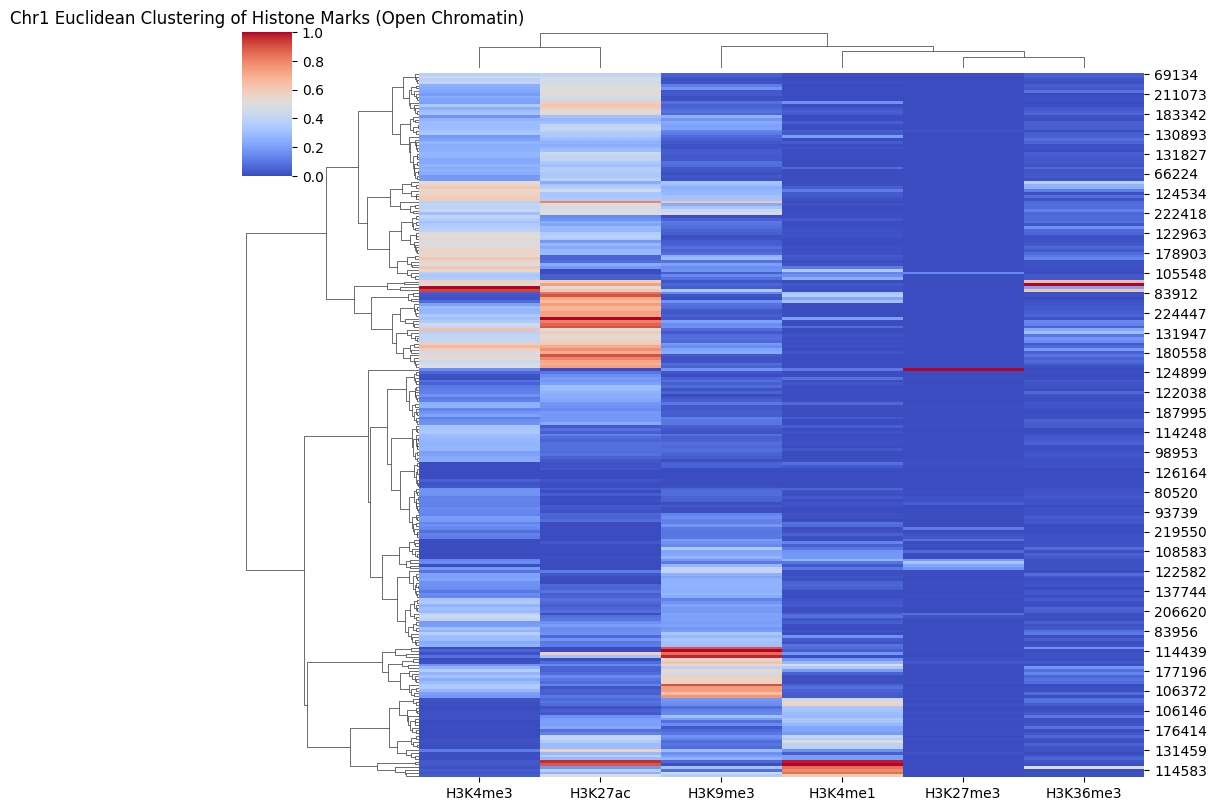

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import pandas as pd

# Load Data
histone_signals_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/genome_bins_histones_chr1_dedup.csv"
histone_columns = ["chromosome", "start", "end", "chromatin_state", "H3K4me1", "H3K4me3", "H3K27ac", "H3K27me3", "H3K9me3", "H3K36me3"]
df = pd.read_csv(histone_signals_file, sep=",", header=None, names=histone_columns)

# Filter for open chromatin state (1)
df = df[df["chromatin_state"] == 1]

# Extract histone marks (columns 5-10)
histone_data = df.iloc[:, 4:]

# Drop any rows with NaN values
histone_data = histone_data.dropna()

# Sample data to prevent memory overload
sample_size = min(10000, len(histone_data))  # Take 10000 rows or all if smaller
histone_sample = histone_data.sample(n=sample_size, random_state=42)

# Normalize histone signals (Min-Max Scaling)
histone_sample = (histone_sample - histone_sample.min()) / (histone_sample.max() - histone_sample.min())
histone_sample = histone_sample.fillna(0)

# Compute linkage matrix for hierarchical clustering
linkage_matrix = sch.linkage(histone_sample, method='ward', metric='euclidean')

# Create a clustermap
sns.clustermap(histone_sample, metric="euclidean", method="ward", cmap="coolwarm", figsize=(10, 8), dendrogram_ratio=(.2, .05))
plt.title("Chr1 Euclidean Clustering of Histone Marks (Open Chromatin)")
plt.show()


### **Interpretation of Euclidean Clustering (Open Chromatin)**  

This heatmap shows **hierarchical clustering** of histone modifications in **open chromatin** regions, based on **Euclidean distance**.  

#### **Key Observations**  
- **H3K4me3 and H3K27ac** cluster together, supporting their role in **active promoters and enhancers**.  
- **H3K9me3 and H3K27me3** show distinct patterns, suggesting **repressive modifications** may still be present in some open chromatin regions.  
- **H3K36me3 is broadly distributed**, aligning with its role in transcription elongation.  
- The clustering structure suggests that **some genomic regions share similar histone modification patterns**, which may indicate functional regulatory elements.  

#### **Euclidean Distance Formula**  
The clustering is based on **Euclidean distance**, computed as:  

$$
d(A, B) = \sqrt{\sum_{i=1}^{n} (A_i - B_i)^2}
$$

where \( A \) and \( B \) are histone modification vectors for two genomic regions.  

This confirms that histone modifications in **open chromatin** regions form structured clusters, potentially defining regulatory landscapes.

### Understanding Annotation Files

#### 1. chromatin_state.bed (Chromatin Segmentation Annotations)
This file contains **epigenetic chromatin states** (e.g., active, repressed, quiescent regions) based on histone marks and other genomic features.

| Column | Description |
|---------|------------|
| **chr** | Chromosome identifier. |
| **start** | Start position of the chromatin state region. |
| **end** | End position of the chromatin state region. |
| **state** | Chromatin state classification (e.g., `Quies`, `TssA`, `TssFlnk`, `TxWk`). |
| **score** | Typically `0`, as chromatin states do not have an individual score. |
| **strand** | Usually `.` since chromatin states are not strand-specific. |
| **thickStart** | Used in visualization; same as `start` in many cases. |
| **thickEnd** | Used in visualization; same as `end` in many cases. |
| **color** | RGB color code for browser visualization (e.g., `255,255,255` for quiescent). |

**Chromatin State Annotations**

| **State** | **Meaning** |
|-----------|------------|
| **TssFInkU** | Upstream flanking transcription start site (TSS). May be involved in regulating gene expression. |
| **TX** | Actively transcribed regions. These regions contain genes that are currently being expressed. |
| **TxWk** | Weak transcription. These regions show some activity but are not as strongly transcribed as TX. |
| **ZNF/Rpts** | Zinc finger repeat elements, often associated with transcriptional regulation. These regions may bind to transcription factors. |
| **TSSA** | Active transcription start sites. Indicates strong promoter activity and gene activation. |
| **TssBiv** | Bivalent transcription start sites. These regions contain both active and repressive histone modifications, meaning they are poised for activation or repression. |
| **TssFInk** | Flanking transcription start sites. These regions are adjacent to active promoters and may play a role in gene regulation. |
| **TssFInkD** | Downstream flanking transcription start sites. May have regulatory roles in controlling downstream gene expression. |
| **Het** | Heterochromatin. This is repressive, tightly packed chromatin, often found in regions with low transcriptional activity. |
| **Quies** | Quiescent/low signal regions. These are inactive chromatin regions, meaning no active transcription or enhancer activity is detected. |
| **ReprPC** | Polycomb-repressed regions. These are repressed by Polycomb-group proteins, which are involved in gene silencing, especially in developmental regulation. |
| **ReprPCWk** | Weak Polycomb repression. These regions are partially repressed and may retain some ability to be activated. |
| **EnhBiv** | Bivalent enhancer. These can switch between active and repressive states, meaning they are poised for activation but not necessarily active. |
| **EnhG1** | Group 1 enhancer. Active enhancer associated with gene activation. |
| **EnhG2** | Group 2 enhancer. Active enhancer, but weaker than EnhG1. |
| **EnhWk** | Weak enhancer. This enhancer has some activity but is not as strong as other enhancer types. |
| **EnhA1** | Active enhancer (type 1). These regions show strong enhancer activity and are likely important for gene regulation. |
| **EnhA2** | Active enhancer (type 2). These enhancers are active but may have slightly different regulatory roles than EnhA1. |

---

**How Do These Affect My Dataset?**  
**Active transcription sites** → `TSSA`, `TssBiv`, `TssFInkU`, `TX`  
**Repressed regions** → `Quies`, `Het`, `ReprPC`, `ReprPCWk`  
**Enhancers** → `EnhBiv`, `EnhG1`, `EnhG2`, `EnhWk`, `EnhA1`, `EnhA2`


**Key Takeaway:**  
This file is useful for **defining chromatin accessibility** and **active vs. inactive genome regions**.

### Load Annotation Files

In [6]:
import pandas as pd

# Define file paths
chromatin_state_bed_path = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/chromatin_state.bed"
chromatin_state_csv_path = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/chromatin_state.csv"

# Load BED file
chromatin_state_df = pd.read_csv(chromatin_state_bed_path, sep="\t", header=None, 
                                 names=["Chromosome", "Start", "End", "State", "Score", "Strand", 
                                        "ThickStart", "ThickEnd", "Color"])

# Save as CSV
chromatin_state_df.to_csv(chromatin_state_csv_path, index=False)

print(f"Chromatin state BED file converted and saved as CSV: {chromatin_state_csv_path}")

Chromatin state BED file converted and saved as CSV: /Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/chromatin_state.csv


__What is One-Hot Encoding?__  
One-hot encoding is a method used to represent categorical variables as binary vectors (0s and 1s). It is commonly used in machine learning when dealing with non-numeric data, like chromatin states.

### Understanding ATAC-Seq
https://www.youtube.com/watch?v=uuxpyhGNDsk

> This video states that accessible regions can be promoters, enhancers or regulatory elements, not necessarily active regions. So let's try group those three and see if it has better correlation.

## Installing and Running HOMER for Peak Annotation

### Step 1: Install Miniconda
To manage dependencies and install HOMER efficiently, Miniconda was installed using the following steps:

```bash
# Create a directory for Miniconda
mkdir -p ~/miniconda3

# Download and install Miniconda
curl https://repo.anaconda.com/miniconda/Miniconda3-latest-MacOSX-x86_64.sh -o ~/miniconda3/miniconda.sh
bash ~/miniconda3/miniconda.sh -b -u -p ~/miniconda3

# Remove the installer to free space
rm ~/miniconda3/miniconda.sh

# Activate Miniconda
source ~/miniconda3/bin/activate

# Initialize Conda for all shells
conda init --all
```

**Verification:**
```bash
# Check if Conda is installed
conda --version
```

---

### Set Up Bioconda Channels
To install **HOMER** and necessary dependencies, Bioconda and Conda-Forge channels were added:

```bash
conda config --add channels bioconda
conda config --add channels conda-forge
conda config --set channel_priority strict
```

---

### Step 3: Install HOMER and Dependencies
HOMER was installed along with required bioinformatics tools:

```bash
conda install wget samtools r-essentials bioconductor-deseq2 bioconductor-edger
```

To confirm the installation:
```bash
which homer
which annotatePeaks.pl
```

---

### Step 4: Configure HOMER
The **`configureHomer.pl`** script was run to download necessary reference data and configure HOMER:

```bash
# Navigate to the HOMER installation directory
cd ~/miniconda3/envs/homer_env/

# Run the HOMER configuration script
perl /Users/faith/Homer/configureHomer.pl -install
```

To ensure HOMER commands are recognized globally, the following was added to the shell configuration file (`.zshrc`):

```bash
echo 'PATH=$PATH:/Users/faith/Homer//bin/' >> ~/.zshrc
source ~/.zshrc
```

---

### Step 5: Annotate Peaks Using HOMER
With HOMER properly set up, **ATAC-seq peaks** were annotated against the human reference genome (`hg38`):

```bash
cd ~/Desktop/BIO1018-Chromatin-Accessibility-ML/data

# Run HOMER peak annotation
annotatePeaks.pl atac_bulk_IDR.bed hg38 > peaks_annotated.txt
```

If `hg38` reference data was missing, it was installed with:

```bash
perl /Users/faith/Homer/configureHomer.pl -install hg38
```

The annotated peaks were saved in `peaks_annotated.txt`, which was then used for further integration into the **feature matrix**.

### Merging HOMER Annotated file with Histone Binned File

In [20]:
import pandas as pd

print("Loading feature matrix...")

# Load the feature matrix with the correct header
feature_matrix_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/genome_bins_histones_chr1_dedup.csv"
feature_matrix = pd.read_csv(feature_matrix_file, sep=",", header=0)  # Explicitly set header

# Rename only the first four columns to title case
feature_matrix.rename(columns={
    "chromosome": "Chromosome",
    "start": "Start",
    "end": "End",
}, inplace=True)

print(f"Feature matrix loaded. Shape: {feature_matrix.shape}")
print(f"Feature matrix columns: {feature_matrix.columns.tolist()}")

# Load HOMER-annotated peaks and filter to chr1
print("Loading HOMER-annotated peaks...")
annotated_peaks_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/peaks_annotated.txt"
homer_columns = ["PeakID", "Chromosome", "Start", "End", "Strand", "Peak Score", "Focus Ratio", "Annotation",
                 "Detailed Annotation", "Distance to TSS", "Nearest PromoterID", "Entrez ID", "Nearest Unigene",
                 "Nearest Refseq", "Nearest Ensembl", "Gene Name", "Gene Alias", "Gene Description", "Gene Type"]

annotated_peaks = pd.read_csv(annotated_peaks_file, sep="\t", names=homer_columns, header=0)

print(f"HOMER annotation file loaded. Shape: {annotated_peaks.shape}")
print("Filtering HOMER annotations to only include chr1...")

# Filter annotated peaks to only include chromosome 1 (chr1)
annotated_peaks = annotated_peaks[annotated_peaks["Chromosome"] == "chr1"]
print(f"Filtered HOMER annotations. Remaining entries: {annotated_peaks.shape[0]}")

# Standardize chromosome column names
feature_matrix["Chromosome"] = feature_matrix["Chromosome"].astype(str).str.lower()
annotated_peaks["Chromosome"] = annotated_peaks["Chromosome"].astype(str).str.lower()

# Initialize new annotation columns (one-hot encoding)
for col in ["Promoter", "Intergenic", "Exon", "Intron"]:
    feature_matrix[col] = 0

print("Initialized one-hot encoding columns for annotations.")

# Function to classify HOMER annotations
def classify_region(annotation):
    if isinstance(annotation, str):
        if "promoter-TSS" in annotation:
            return "Promoter"
        elif "Intergenic" in annotation:
            return "Intergenic"
        elif "exon" in annotation:
            return "Exon"
        elif "intron" in annotation:
            return "Intron"
    return None  # If it doesn't match any category

# Apply classification function
annotated_peaks["Region"] = annotated_peaks["Annotation"].apply(classify_region)

# Print region classification summary
print("Region classification counts:")
print(annotated_peaks["Region"].value_counts())

# Merge HOMER annotations with feature matrix based on genomic coordinates
print("Starting annotation merge...")
overlap_counts = {"Promoter": 0, "Intergenic": 0, "Exon": 0, "Intron": 0}

for _, row in annotated_peaks.iterrows():
    overlap_mask = (feature_matrix["Chromosome"] == row["Chromosome"]) & \
                   (feature_matrix["Start"] < row["End"]) & \
                   (feature_matrix["End"] > row["Start"])
    
    if row["Region"]:
        affected_rows = overlap_mask.sum()
        feature_matrix.loc[overlap_mask, row["Region"]] = 1
        overlap_counts[row["Region"]] += affected_rows

print("Annotation merge completed.")
for category, count in overlap_counts.items():
    print(f"{category} overlaps found: {count}")

# Save the updated dataset
updated_feature_matrix_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/peak_feature_matrix_chr1.csv"
feature_matrix.to_csv(updated_feature_matrix_file, index=False)

print(f"Updated feature matrix saved: {updated_feature_matrix_file}")
print("Processing completed successfully.")

Loading feature matrix...
Feature matrix loaded. Shape: (224549, 10)
Feature matrix columns: ['Chromosome', 'Start', 'End', 'chromatin_state', 'H3K4me1', 'H3K4me3', 'H3K27ac', 'H3K27me3', 'H3K9me3', 'H3K36me3']
Loading HOMER-annotated peaks...
HOMER annotation file loaded. Shape: (173574, 19)
Filtering HOMER annotations to only include chr1...
Filtered HOMER annotations. Remaining entries: 16100
Initialized one-hot encoding columns for annotations.
Region classification counts:
Region
Intron        6106
Intergenic    5124
Promoter      3152
Exon          1317
Name: count, dtype: int64
Starting annotation merge...
Annotation merge completed.
Promoter overlaps found: 6773
Intergenic overlaps found: 8642
Exon overlaps found: 2690
Intron overlaps found: 10679
Updated feature matrix saved: /Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/peak_feature_matrix_chr1.csv
Processing completed successfully.


### Genomic Region Distribution (HOMER) for Peaks

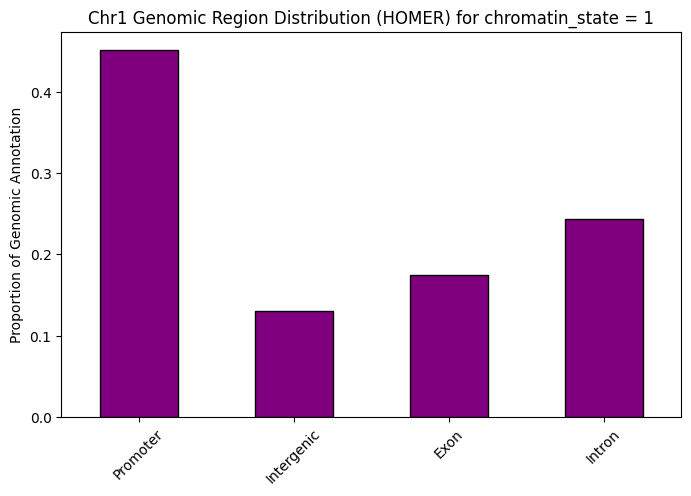

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the original HOMER-annotated feature matrix
file_path = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/peak_feature_matrix_chr1.csv"
df = pd.read_csv(file_path)

# Convert chromatin_state to int (if needed)
df["chromatin_state"] = pd.to_numeric(df["chromatin_state"], errors="coerce").fillna(0).astype(int)

# Filter only for Peak = 1 (since HOMER only annotated peaks)
df_peak1 = df[df["chromatin_state"] == 1]

# Define HOMER annotation categories
homer_annotations = ["Promoter", "Intergenic", "Exon", "Intron"]

# Compute proportions of each annotation type
annotation_counts = df_peak1[homer_annotations].sum()
annotation_counts_norm = annotation_counts / annotation_counts.sum()  # Normalize for better comparison

# Plot bar chart
plt.figure(figsize=(8, 5))
annotation_counts_norm.plot(kind="bar", color="purple", edgecolor="black")
plt.title("Chr1 Genomic Region Distribution (HOMER) for chromatin_state = 1")
plt.ylabel("Proportion of Genomic Annotation")
plt.xticks(rotation=45)
plt.show()

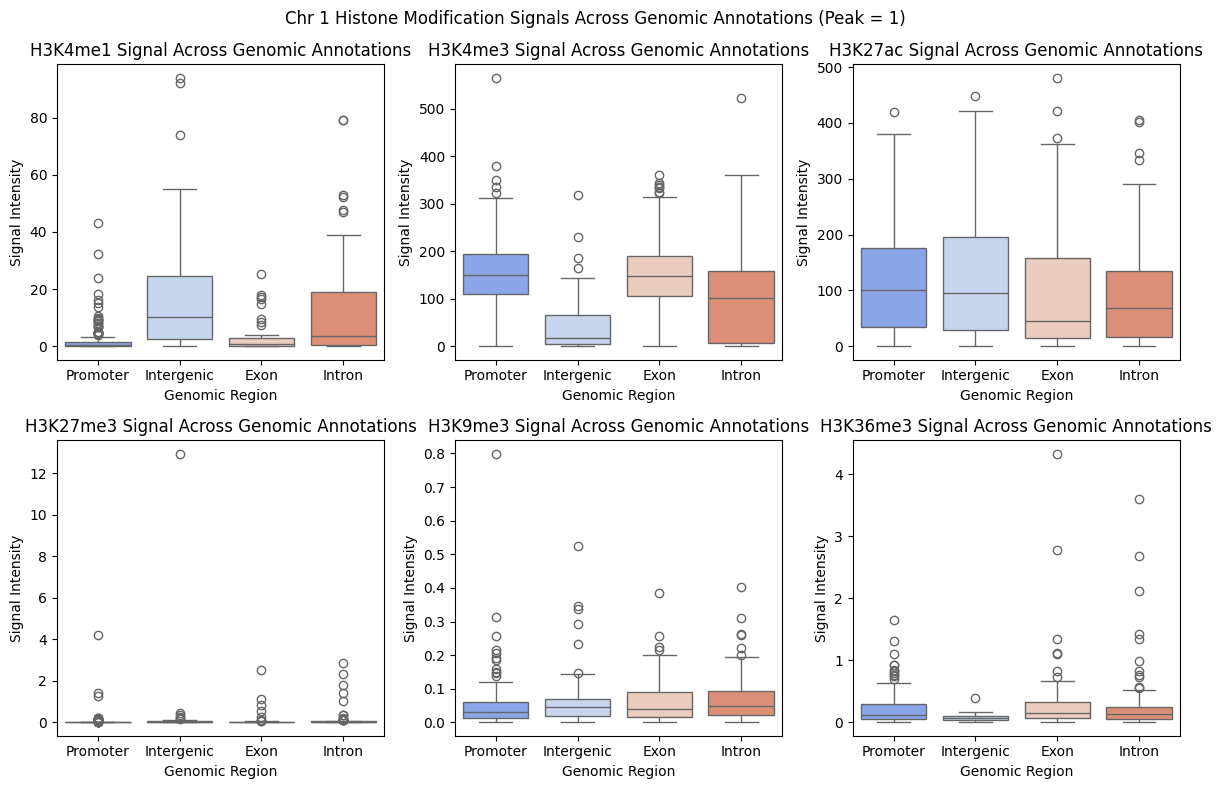

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define histone marks
histone_marks = ["H3K4me1", "H3K4me3", "H3K27ac", "H3K27me3", "H3K9me3", "H3K36me3"]
annotations = ["Promoter", "Intergenic", "Exon", "Intron"]

# Convert categorical annotations to long format for seaborn
df_long = df_peak1.melt(id_vars=["chromatin_state"], value_vars=histone_marks + annotations, 
                         var_name="Feature", value_name="Signal")

# Separate histone marks and annotations
histone_df = df_long[df_long["Feature"].isin(histone_marks)]
annotation_df = df_long[df_long["Feature"].isin(annotations)]

# Create boxplots for each histone mark across different genomic regions
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle("Chr 1 Histone Modification Signals Across Genomic Annotations (Peak = 1)")

for i, histone in enumerate(histone_marks):
    ax = axes[i // 3, i % 3]
    
    # Select relevant subset
    histone_subset = df_peak1[["Promoter", "Intergenic", "Exon", "Intron", histone]].melt(
        id_vars=[histone], var_name="Genomic Region", value_name="Presence"
    )

    # Filter only present annotations
    histone_subset = histone_subset[histone_subset["Presence"] == 1]

    sns.boxplot(data=histone_subset, x="Genomic Region", y=histone, ax=ax, hue="Genomic Region", legend=False, palette="deep")
    ax.set_title(f"{histone} Signal Across Genomic Annotations")
    ax.set_ylabel("Signal Intensity")
    ax.set_xlabel("Genomic Region")

plt.tight_layout()
plt.show()

### Histone Modification Signals Across Genomic Annotations

These boxplots display the distribution of histone modification signals across different genomic regions (Promoter, Intergenic, Exon, and Intron) for ATAC-seq peaks (**chromatin_state = 1**). Each histone mark represents a distinct epigenetic modification associated with either active or repressive chromatin states.

- **H3K4me1**: Typically linked to enhancer activity. The signal is slightly higher in intergenic and intronic regions, aligning with its role in marking enhancers located outside promoter regions.

- **H3K4me3**: Associated with active promoters, showing the highest signal intensity in promoters, consistent with its role in marking transcription start sites. Intergenic and intronic regions exhibit lower levels.

- **H3K27ac**: Shows relatively consistent signal intensity across all genomic annotations, reinforcing its role in marking both active promoters and enhancers.

- **H3K27me3**: A repressive histone modification, with low but consistent signal intensity across genomic regions, suggesting broad chromatin repression.

- **H3K9me3**: A marker of constitutive heterochromatin. Low signal intensity is observed in all regions, with slightly higher levels in intergenic and intronic regions, reflecting its role in silencing repetitive elements.

- **H3K36me3**: Typically found in actively transcribed gene bodies. The signal remains relatively low but is slightly more enriched in exons compared to other regions.

These patterns highlight the expected distribution of histone marks in regulatory and transcribed regions, providing insight into chromatin accessibility and transcriptional regulation.


### ANOVA (Histone Marks Across Genomic Annotations)


In [27]:
from scipy.stats import f_oneway
import pandas as pd

# Load dataset
file_path = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/peak_feature_matrix_chr1.csv"
df = pd.read_csv(file_path)

# Define histone marks and HOMER annotations
histone_marks = ["H3K4me1", "H3K4me3", "H3K27ac", "H3K27me3", "H3K9me3", "H3K36me3"]
homer_annotations = ["Promoter", "Intergenic", "Exon", "Intron"]

# ANOVA Test for Histone Marks across Genomic Annotations
print("ANOVA Results (Histone Marks Across Genomic Annotations):")

for histone in histone_marks:
    # Collect histone signal values for each annotation type
    grouped_data = [df.loc[df[region] == 1, histone].dropna() for region in homer_annotations]
    
    # Ensure there are enough values in each group (ANOVA needs at least 2 non-empty groups)
    if all(len(g) > 1 for g in grouped_data):
        stat, p = f_oneway(*grouped_data)
        print(f"{histone}: F-statistic = {stat:.3f}, p-value = {p:.5f}")
    else:
        print(f"{histone}: Not enough data in some groups for ANOVA")

ANOVA Results (Histone Marks Across Genomic Annotations):
H3K4me1: F-statistic = 56.017, p-value = 0.00000
H3K4me3: F-statistic = 2297.534, p-value = 0.00000
H3K27ac: F-statistic = 319.805, p-value = 0.00000
H3K27me3: F-statistic = 11.439, p-value = 0.00000
H3K9me3: F-statistic = 38.674, p-value = 0.00000
H3K36me3: F-statistic = 173.035, p-value = 0.00000


The **ANOVA (Analysis of Variance)** test is used to determine whether there are statistically significant differences in the mean histone modification signals across different **genomic annotations** (Promoter, Intergenic, Exon, Intron). 

### Formula for the F-statistic in One-Way ANOVA

$$
F = \frac{\text{variance between groups}}{\text{variance within groups}}
$$

A **higher F-statistic** suggests greater variation between groups compared to within groups. The **p-value** determines statistical significance—if it is below 0.05, we reject the null hypothesis that all groups have the same mean.

### Interpreting the Results
- **H3K4me1: F = 56.017, p < 0.00001**  
  This suggests a strong and significant difference in H3K4me1 levels across genomic annotations. H3K4me1 is typically associated with **enhancers and active regulatory regions**, so its variation across different annotations is expected.

- **H3K4me3: F = 2297.534, p < 0.00001**  
  This extremely high F-statistic and near-zero p-value indicate that H3K4me3 is **highly differentially distributed** across genomic annotations. Since H3K4me3 is a strong **promoter-associated mark**, it likely shows substantial enrichment in promoter regions compared to other regions.

- **H3K27ac: F = 319.805, p < 0.00001**  
  The high F-statistic suggests a strong differential distribution of H3K27ac across genomic annotations. As an active enhancer mark, it is expected to be enriched in regulatory regions, particularly in promoters and enhancers.

- **H3K27me3: F = 11.439, p < 0.00001**  
  This significant F-statistic suggests that H3K27me3 is **differentially distributed across genomic annotations**. H3K27me3 is a **repressive histone mark**, often associated with heterochromatin and gene silencing, so its specific enrichment in certain regions (e.g., repressed gene bodies) likely drives this difference.

- **H3K9me3: F = 38.674, p < 0.00001**  
  The significant variation in H3K9me3 across genomic annotations aligns with its role as a **heterochromatin-associated repressive mark**. Its differential enrichment suggests it is more prominent in regions of transcriptional repression.

- **H3K36me3: F = 173.035, p < 0.00001**  
  H3K36me3 is an elongation mark associated with actively transcribed gene bodies. The high F-statistic suggests its differential presence across genomic annotations, particularly in exons where transcription elongation occurs.

**Key Takeaways**
- H3K4me3 shows the **strongest differential distribution**, as expected due to its role in marking promoters.
- H3K27ac and H3K36me3 also show significant differences, highlighting their roles in **enhancers and transcription elongation**, respectively.
- H3K4me1 and H3K9me3 exhibit substantial differences, confirming their regulatory functions in **enhancers and heterochromatin**.
- H3K27me3, while having a lower F-statistic, still shows a significant difference, supporting its role in **chromatin repression**.
- These findings confirm that **histone modifications are not randomly distributed** but are strongly associated with specific genomic regions.

This analysis helps to **validate feature selection for machine learning**—if a histone mark shows strong differentiation across regions, it is likely an informative feature for predicting chromatin accessibility.

### Integrating HOMER Annotations with Chromatin State Data for a Complete Feature Matrix

My current HOMER-annotated peaks provide genomic annotations (e.g., promoter, exon, intron, intergenic) only where peaks exist. However, this leaves large portions of the genome unannotated, even though non-peak regions still contain biologically meaningful chromatin states.

This creates a challenge:
- HOMER only annotates regions where peaks were found, leaving most 1kb bins with zeros in their annotation columns.
- Many regions classified as 0 across all annotation columns may still have functional chromatin states, but they were not assigned a label because they lacked peaks.
- If my neural network is trained on incomplete data, it may fail to recognize functionally relevant regions outside of peak locations.

#### How I Will Fix This
I will merge HOMER annotations with chromatin state data to ensure that every 1kb bin has a meaningful genomic label.

1. Preserve HOMER annotations where available  
   - If a 1kb bin already has a HOMER annotation (promoter, intergenic, exon, intron, non-coding = 1), I leave it unchanged.

2. Fill in missing annotations using chromatin state data  
   - If a bin has all zeros in its annotation columns, I check the chromatin state dataset.
   - If the chromatin state overlaps with the bin, I assign the appropriate annotation.

3. Ensure consistency between annotation sources  
   - If a bin already has an annotation from HOMER, I do not override it.
   - If a bin was not annotated by HOMER but has a chromatin state, I update the annotation column accordingly.

#### Why This Improves My Dataset
- Every 1kb bin will now have a meaningful annotation based on either HOMER or chromatin states.
- Prevents excessive zeros, ensuring that the neural network does not mistakenly learn that most of the genome is unclassified.
- Combines information from two annotation strategies, increasing the reliability of the dataset.
- Allows for better feature selection for downstream machine learning models, ensuring that the chromatin accessibility model considers both peak and non-peak regions.

This strategy ensures that the annotations remain MCF-7 specific, as the chromatin state data used for filling in the missing regions is derived from ENCODE’s MCF-7 ChromHMM segmentation, which reflects experimentally validated chromatin accessibility and regulatory elements in this specific cell line. By integrating these annotations, I ensure that my final feature matrix accurately represents the chromatin landscape of MCF-7 cells across both peak and non-peak regions.

In [32]:
import pandas as pd

print("Loading feature matrix...")
feature_matrix_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/peak_feature_matrix_chr1.csv"
feature_matrix = pd.read_csv(feature_matrix_file)

print(f"Feature matrix loaded. Shape: {feature_matrix.shape}")

print("Loading chromatin state dataset in chunks...")
chromatin_state_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/chromatin_state.csv"
chunk_size = 5000  # Adjust chunk size based on performance testing

# Define the column names for the chromatin state file
chromatin_columns = ["Chromosome", "Start", "End", "State", "Score", "Strand", "ThickStart", "ThickEnd", "Color"]

# Define chromatin state to annotation mapping
chromatin_to_annotation = {
    "TSSA": "Promoter", "TssBiv": "Promoter", "TssFInkU": "Promoter", "TX": "Promoter",
    "EnhBiv": "Intergenic", "EnhG1": "Intergenic", "EnhG2": "Intergenic", "EnhWk": "Intergenic", "EnhA1": "Intergenic", "EnhA2": "Intergenic",
    "Quies": "Intron", "Het": "Intron", "ReprPC": "Intron", "ReprPCWk": "Intron"
}

# Ensure annotation columns exist in the feature matrix
annotation_cols = ["Promoter", "Intergenic", "Exon", "Intron"]
for col in annotation_cols:
    if col not in feature_matrix.columns:
        feature_matrix[col] = 0

# Ensure Chromosome, Start, End are properly formatted in the feature matrix
feature_matrix["Chromosome"] = feature_matrix["Chromosome"].astype(str).str.lower()
feature_matrix["Start"] = pd.to_numeric(feature_matrix["Start"], errors="coerce").fillna(0).astype(int)
feature_matrix["End"] = pd.to_numeric(feature_matrix["End"], errors="coerce").fillna(0).astype(int)

print("Filling missing annotations using chromatin state data...")

# Process chromatin states in chunks
for chunk_num, chunk in enumerate(pd.read_csv(chromatin_state_file, sep=",", header=None, names=chromatin_columns, chunksize=chunk_size)):
    # Filter to chr1 and explicitly create a copy to avoid SettingWithCopyWarning
    chunk = chunk[chunk["Chromosome"] == "chr1"].copy()
    print(f"Processing chunk {chunk_num + 1} with {chunk.shape[0]} rows...")

    # Ensure chromosome formatting is consistent
    chunk["Chromosome"] = chunk["Chromosome"].astype(str).str.lower()
    chunk["Start"] = pd.to_numeric(chunk["Start"], errors="coerce").fillna(0).astype(int)
    chunk["End"] = pd.to_numeric(chunk["End"], errors="coerce").fillna(0).astype(int)

    # Iterate through chunk and assign missing annotations
    for _, row in chunk.iterrows():
        overlap_mask = (feature_matrix["Chromosome"] == row["Chromosome"]) & \
                       (feature_matrix["Start"] < row["End"]) & \
                       (feature_matrix["End"] > row["Start"])

        annotation = chromatin_to_annotation.get(row["State"], None)
        
        if annotation:
            # Only assign if the bin is unannotated (all zeros in annotation columns)
            empty_mask = feature_matrix.loc[overlap_mask, annotation_cols].sum(axis=1).eq(0)
            feature_matrix.loc[overlap_mask & empty_mask, annotation] = 1

print("Annotation filling completed.")

# Save the updated dataset
updated_feature_matrix_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/final_feature_matrix_chr1.csv"
feature_matrix.to_csv(updated_feature_matrix_file, index=False)

print(f"Updated feature matrix saved: {updated_feature_matrix_file}")
print("Processing completed successfully.")

Loading feature matrix...
Feature matrix loaded. Shape: (224549, 14)
Loading chromatin state dataset in chunks...
Filling missing annotations using chromatin state data...
Processing chunk 1 with 4999 rows...
Processing chunk 2 with 5000 rows...
Processing chunk 3 with 5000 rows...
Processing chunk 4 with 5000 rows...
Processing chunk 5 with 5000 rows...
Processing chunk 6 with 5000 rows...
Processing chunk 7 with 5000 rows...
Processing chunk 8 with 3541 rows...
Processing chunk 9 with 0 rows...
Processing chunk 10 with 0 rows...
Processing chunk 11 with 0 rows...
Processing chunk 12 with 0 rows...
Processing chunk 13 with 0 rows...
Processing chunk 14 with 0 rows...
Processing chunk 15 with 0 rows...
Processing chunk 16 with 0 rows...
Processing chunk 17 with 0 rows...
Processing chunk 18 with 0 rows...
Processing chunk 19 with 0 rows...
Processing chunk 20 with 0 rows...
Processing chunk 21 with 0 rows...
Processing chunk 22 with 0 rows...
Processing chunk 23 with 0 rows...
Processi

### Counting Before and After

In [33]:
import pandas as pd

# File paths
homer_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/peak_feature_matrix_chr1.csv"
combined_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/final_feature_matrix_chr1.csv"

# Load datasets
print("Loading original HOMER-annotated file...")
homer_df = pd.read_csv(homer_file)
print("Loading combined feature matrix file...")
combined_df = pd.read_csv(combined_file)

# Define annotation columns
annotation_cols = ["Promoter", "Intergenic", "Exon", "Intron"]

# Count occurrences in the original HOMER file
print("\nChromatin State Counts in Original HOMER File:")
homer_counts = homer_df[annotation_cols].sum()
print(homer_counts)

# Count occurrences in the combined dataset
print("\nChromatin State Counts in Combined Feature Matrix:")
combined_counts = combined_df[annotation_cols].sum()
print(combined_counts)

Loading original HOMER-annotated file...
Loading combined feature matrix file...

Chromatin State Counts in Original HOMER File:
Promoter      2134
Intergenic    4568
Exon           983
Intron        5310
dtype: int64

Chromatin State Counts in Combined Feature Matrix:
Promoter        2148
Intergenic     12231
Exon             983
Intron        171555
dtype: int64


### Final EDA of HOMER + Chromatin State (ENCODE) to Understand Feature Importance

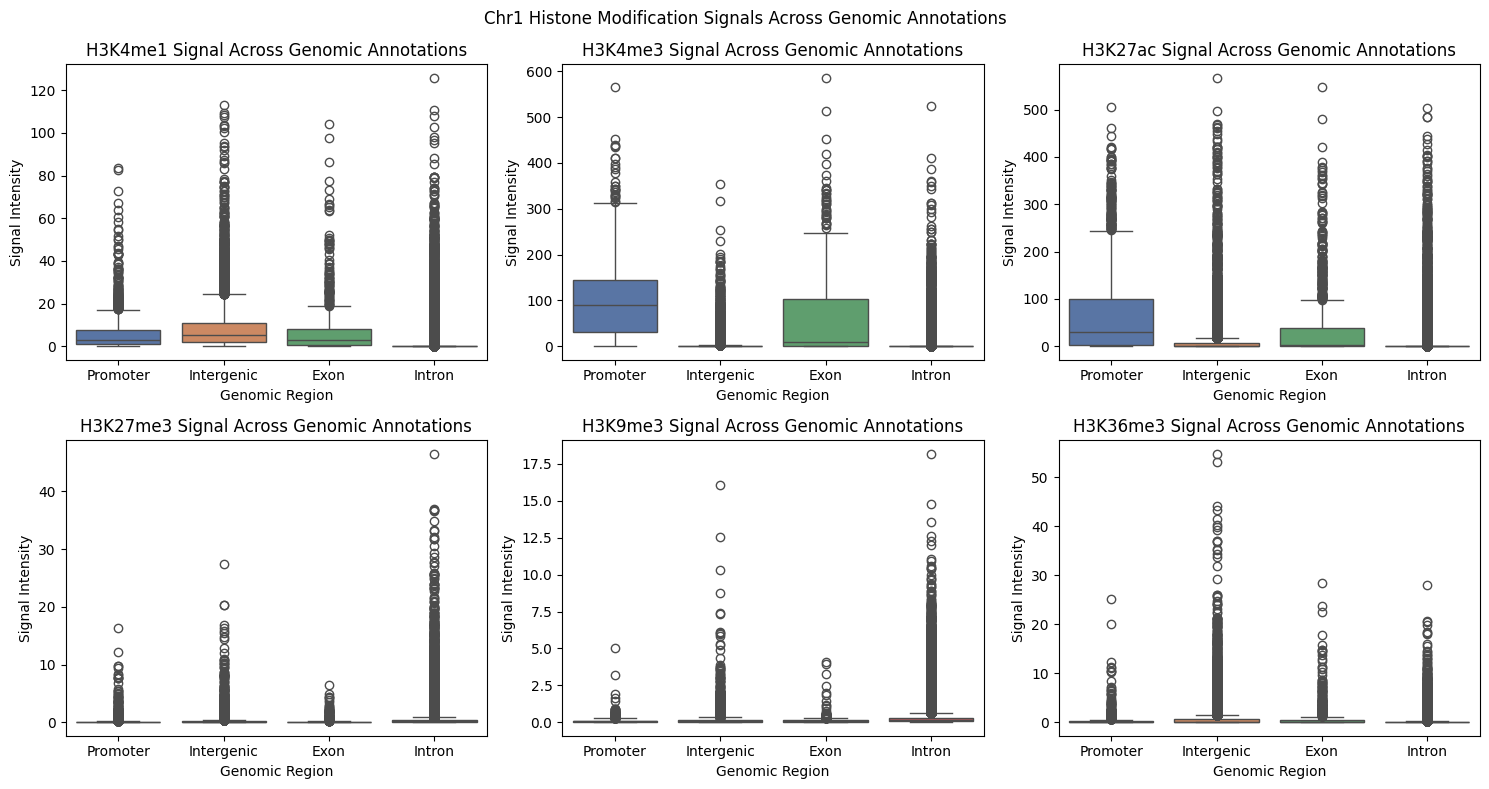

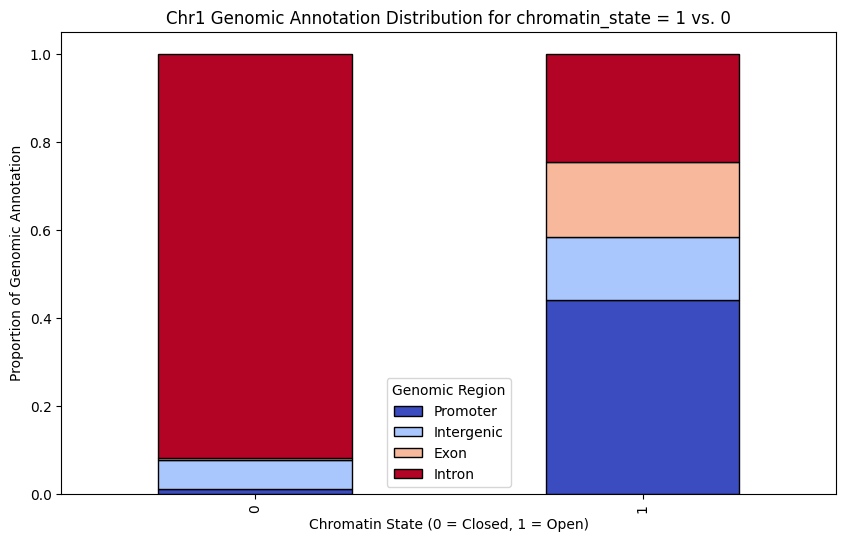

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated feature matrix
file_path = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/final_feature_matrix_chr1.csv"
df = pd.read_csv(file_path)

# Convert chromatin_state to int (if needed)
df["chromatin_state"] = pd.to_numeric(df["chromatin_state"], errors="coerce").fillna(0).astype(int)

# Define HOMER annotation categories and histone marks
homer_annotations = ["Promoter", "Intergenic", "Exon", "Intron"]
histone_marks = ["H3K4me1", "H3K4me3", "H3K27ac", "H3K27me3", "H3K9me3", "H3K36me3"]

# Convert categorical annotations to long format for seaborn
df_long = df.melt(id_vars=["chromatin_state"], value_vars=histone_marks + homer_annotations, 
                   var_name="Feature", value_name="Signal")

# Create boxplots for each histone mark across different genomic regions
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("Chr1 Histone Modification Signals Across Genomic Annotations")

for i, histone in enumerate(histone_marks):
    ax = axes[i // 3, i % 3]
    
    # Select relevant subset
    histone_subset = df[["Promoter", "Intergenic", "Exon", "Intron", histone]].melt(
        id_vars=[histone], var_name="Genomic Region", value_name="Presence"
    )

    # Filter only present annotations
    histone_subset = histone_subset[histone_subset["Presence"] == 1]

    sns.boxplot(data=histone_subset, x="Genomic Region", y=histone, ax=ax, hue="Genomic Region", legend=False, palette="deep")
    ax.set_title(f"{histone} Signal Across Genomic Annotations")
    ax.set_ylabel("Signal Intensity")
    ax.set_xlabel("Genomic Region")

plt.tight_layout()
plt.show()

# Stacked bar chart for chromatin_state = 1 and 0 across genomic annotations
state_counts = df.groupby("chromatin_state")[homer_annotations].sum()
state_counts_norm = state_counts.div(state_counts.sum(axis=1), axis=0)  # Normalize for better comparison

state_counts_norm.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm", edgecolor="black")
plt.title("Chr1 Genomic Annotation Distribution for chromatin_state = 1 vs. 0")
plt.xlabel("Chromatin State (0 = Closed, 1 = Open)")
plt.ylabel("Proportion of Genomic Annotation")
plt.legend(title="Genomic Region")
plt.show()

/var/folders/09/0r9l07110lg5nj9ndgsx9kl80000gn/T/ipykernel_1181/2406595682.py:12: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(annotations_file, sep=",", names=columns)
/var/folders/09/0r9l07110lg5nj9ndgsx9kl80000gn/T/ipykernel_1181/2406595682.py:24: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(hamming_dist, method='average')


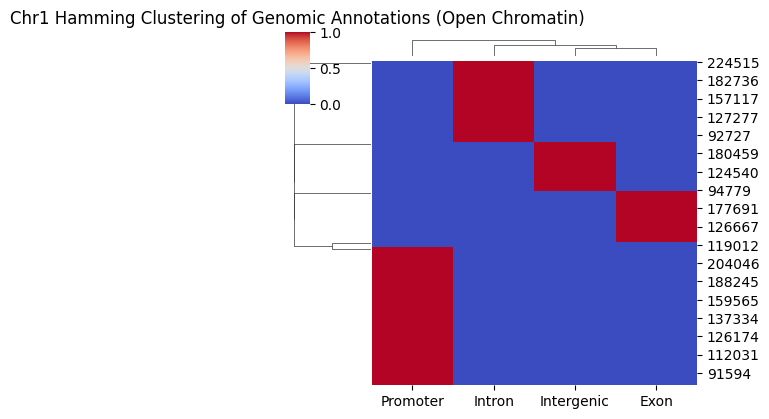

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import pandas as pd
from scipy.spatial.distance import pdist, squareform

# Load Data with Explicit Data Types
annotations_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/final_feature_matrix_chr1.csv"
columns = ["chromosome", "start", "end", "chromatin_state", "H3K4me1", "H3K4me3", "H3K27ac", "H3K27me3", "H3K9me3", "H3K36me3", "Promoter", "Intergenic", "Exon", "Intron"]

df = pd.read_csv(annotations_file, sep=",", names=columns)

# Filter for open chromatin state (1)
df = df[df["chromatin_state"] == 1]

# Extract genomic annotations (last four columns)
genomic_annotations = df.iloc[:, -4:].astype(int)  # Ensure integer type

# Compute Hamming distance
hamming_dist = squareform(pdist(genomic_annotations, metric='hamming'))

# Compute linkage matrix for hierarchical clustering using Hamming distance
linkage_matrix = sch.linkage(hamming_dist, method='average')

# Create a clustermap
sns.clustermap(genomic_annotations, metric="hamming", method="average", cmap="coolwarm", figsize=(5, 4), dendrogram_ratio=(.2, .05))
plt.title("Chr1 Hamming Clustering of Genomic Annotations (Open Chromatin)")
plt.show()


### **Interpretation of Hamming Clustering of Genomic Annotations (Open Chromatin)**  

This heatmap shows **hierarchical clustering** of genomic annotations (**Promoter, Intergenic, Exon, Intron**) in **open chromatin regions**, based on **Hamming distance**.  

#### **Key Observations**  
- **Promoters and Introns** cluster together, indicating that they share more similar annotation patterns than other genomic regions.  
- **Intergenic and Exonic regions** form distinct clusters, suggesting that they are functionally separate from promoter and intron regions.  
- The clustering structure confirms that **genomic annotations are not randomly distributed** but are categorized based on **distinct regulatory or functional roles**.  

#### **Hamming Distance Formula**  
The clustering is based on **Hamming distance**, which measures the fraction of differing elements between two binary annotation vectors:

$$
d_H(A, B) = \frac{1}{n} \sum_{i=1}^{n} \mathbb{1}(A_i \neq B_i)
$$

where:
- \( A \) and \( B \) are **binary annotation vectors** for two genomic regions.
- \( n \) is the total number of elements.
- $ \mathbb{1}(A_i \neq B_i) $ is an indicator function that counts mismatches.

This confirms that genomic annotations in **open chromatin** regions form structured clusters, reflecting their distinct roles in gene regulation.

> This concludes the preprocessing steps. The MCF-7 processed dataset can be found on Google Drive here:  

https://drive.google.com/drive/folders/1ZScVv8E_g4-4_wqVfMd8LhzXBu9IX_yO?usp=sharing